## Import package and libraries

In [2]:
import pandas as pd
import numpy as np
import joblib as jlb

from utils.preprocessing import readData
from utils.fetchData import fetch_all_data
from utils.classify import feedbackSentimentAnalysis
from vectorizer.tfidf import VietnameseTfidfVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report

In [3]:
sentences = readData("_UIT-VSFC/Corpus.txt")
len(sentences)

16178

# Fetch all data

In [4]:
fetch_all_data()

Directory 'Data' already exists.
Sucessfully Fetching


# Sentiment 

## Uni-gram

In [5]:
# vectorizer = VietnameseTfidfVectorizer()
# vectorizer.fit(sentences)

### Save Uni-gram TF-IDF

In [6]:
# import joblib

# joblib.dump(vectorizer, 'models/vietnamese_tfidf_vectorizer.pkl')

In [7]:
import joblib
vectorizer = joblib.load('models/vietnamese_tfidf_vectorizer.pkl')

In [8]:
vocabulary = vectorizer.vocabulary_
print("Tổng số từ vựng: ", len(vocabulary))

Tổng số từ vựng:  4820


In [9]:
train_df = pd.read_csv("Data/train.csv")
test_df = pd.read_csv("Data/test.csv")

x_train, y_train = train_df["sents"], train_df["sentiments"]
x_test, y_test = test_df["sents"], test_df["sentiments"]

In [10]:
x_train_tfidf = vectorizer.transform(x_train.tolist()).toarray()

### MaxEnt

In [11]:
ridge_classifier = RidgeClassifier()

In [12]:
# Define the parameter grid for grid search
param_grid = {'alpha':  np.arange(0.1, 1.1, 0.1)}

# Perform grid search
grid_search = GridSearchCV(ridge_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_tfidf, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

In [ ]:
ridge_classifier = RidgeClassifier(alpha=1.0)
ridge_classifier.fit(x_train_tfidf, y_train)

RidgeClassifier(alpha=0.1)

In [21]:
x_test_tfidf = vectorizer.transform(x_test.tolist()).toarray()
ridge_predictions = ridge_classifier.predict(x_test_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_test, ridge_predictions))

ridge_accuracy = accuracy_score(y_test, ridge_predictions)
ridge_precision = precision_score(y_test, ridge_predictions, average="weighted")
ridge_recall = recall_score(y_test, ridge_predictions, average="weighted")
ridge_f1 = f1_score(y_test, ridge_predictions, average="weighted")

print("Accuracy: ", ridge_accuracy)
print("Precision: ", ridge_precision)
print("Recall: ", ridge_recall)
print("F1-Score: ", ridge_f1)

Confusion Matrix:
[[1201   26  182]
 [  51   17   99]
 [ 119   10 1461]]
Accuracy:  0.8461781427668983
Precision:  0.8279763399705158
Recall:  0.8461781427668983
F1-Score:  0.8330945604447123


In [22]:
ridge_result = classification_report(y_test, ridge_predictions)
print(ridge_result)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1409
           1       0.32      0.10      0.15       167
           2       0.84      0.92      0.88      1590

    accuracy                           0.85      3166
   macro avg       0.68      0.62      0.63      3166
weighted avg       0.83      0.85      0.83      3166



<Axes: >

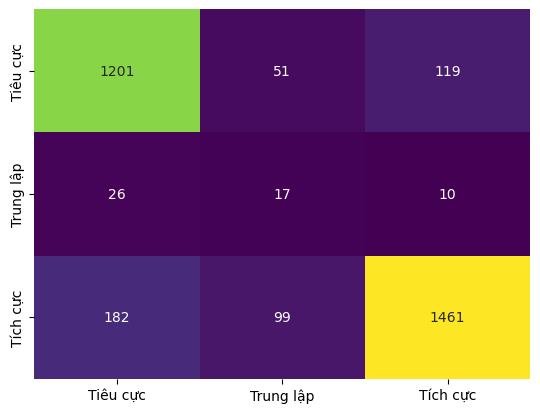

In [23]:
import seaborn as sns
ridge_conf_matrix = confusion_matrix(ridge_predictions, y_test)
sns.heatmap(ridge_conf_matrix, annot=True, fmt="d",cmap="viridis", cbar=False,
                 xticklabels=["Tiêu cực", "Trung lập", "Tích cực"], yticklabels=["Tiêu cực", "Trung lập", "Tích cực"])

In [24]:
result_df_MNB = pd.DataFrame({
    'text': x_test,
    'true_label': y_test,
    'predicted_label': ridge_predictions
})
result_df_MNB.head(10)

,text,true_label,predicted_label
0,nói tiếng anh lưu loát .,2,2
1,giáo viên rất vui tính .,2,2
2,cô max có tâm .,2,2
3,"giảng bài thu hút , dí dỏm .",2,2
4,"giáo viên không giảng dạy kiến thức , hướng dẫ...",0,0
5,thầy dạy nhiệt tình và tâm huyết .,2,2
6,tính điểm thi đua các nhóm .,2,1
7,thầy nhiệt tình giảng lại cho học sinh .,2,2
8,có đôi lúc nói hơi nhanh làm sinh viên không t...,0,0
9,"giảng dạy nhiệt tình , liên hệ thực tế khá nhi...",2,2


In [25]:
example1 = "Thầy dạy không hay lắm, bài tập khá nhiều"
vector1 = vectorizer.transform([example1]).toarray()
result1 = ridge_classifier.predict(vector1)[0]
sentiment = feedbackSentimentAnalysis(result1)
print("Sentiment: ", sentiment)

Sentiment:  Tiêu Cực


# Save Models

In [20]:
import joblib

# Assuming 'ridge_model' is your Ridge Regression model
joblib.dump(ridge_classifier, 'models/ridge_model.pkl')

['models/ridge_model.pkl']